In [1]:
from fastai.vision.all import *
from fastai import *

/home/pppfkp/miniforge3/lib/python3.10/site-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.7) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
/home/pppfkp/miniforge3/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
path = Path("images")
path.ls()

(#2) [Path('images/dwadziescia'),Path('images/dziesiec')]

In [3]:
data = ImageDataLoaders.from_folder(path, valid_pct=0.2, item_tfms=Resize(128))
data

/home/pppfkp/miniforge3/lib/python3.10/site-packages/fastai/data/transforms.py:225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(col):


In [4]:
len(data.train_ds.items)

104

In [8]:
learner_01 = vision_learner(data, models.resnet18,pretrained=True, loss_func=CrossEntropyLossFlat(), metrics=error_rate)

In [9]:
learner_01.fit(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.382432,2.239396,0.520000,00:03
1,0.877480,1.402139,0.360000,00:03
2,0.619371,0.899634,0.280000,00:03
3,0.496533,0.534910,0.240000,00:03
4,0.432114,0.301665,0.160000,00:03
5,0.364612,0.202354,0.040000,00:03
6,0.327728,0.127769,0.040000,00:03
7,0.299814,0.047517,0.040000,00:03
8,0.268598,0.016931,0.000000,00:03
9,0.253838,0.005701,0.000000,00:03


In [10]:
learner_01.predict(data.valid_ds.items[0])

('dwadziescia', tensor(0), tensor([9.9950e-01, 4.9623e-04]))

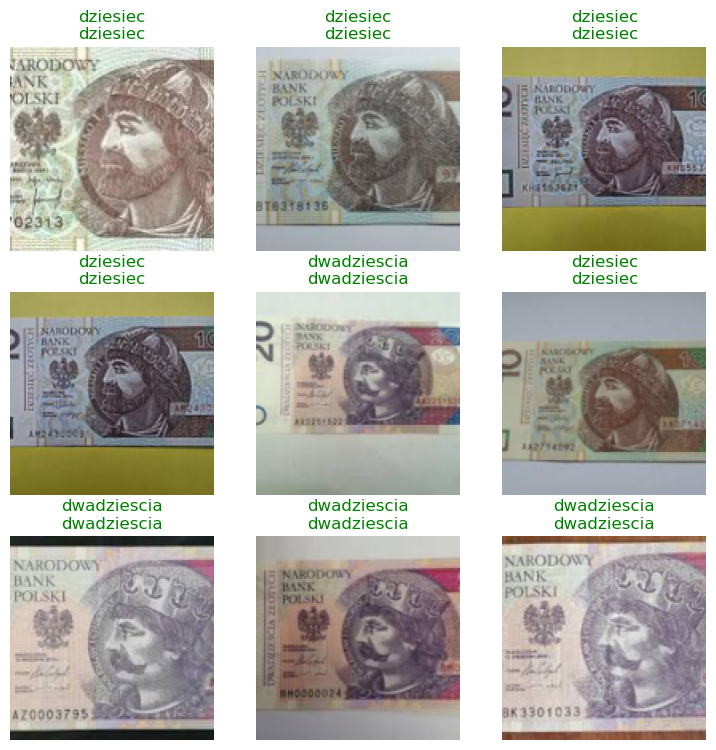

In [11]:
learner_01.show_results()

In [12]:
import ipywidgets as widgets

uploader = widgets.FileUpload()
display(uploader)

FileUpload(value=(), description='Upload')

In [19]:
uploaded_file = uploader.value[0]
uploaded_file

{'name': 'WIN_20231108_08_36_22_Pro.jpg',
 'type': 'image/jpeg',
 'size': 270343,
 'content': <memory at 0x7f9c5b883b80>,
 'last_modified': datetime.datetime(2023, 11, 8, 7, 36, 22, 425000, tzinfo=datetime.timezone.utc)}

In [20]:
uploaded_file = Image.open(io.BytesIO(uploaded_file.content))

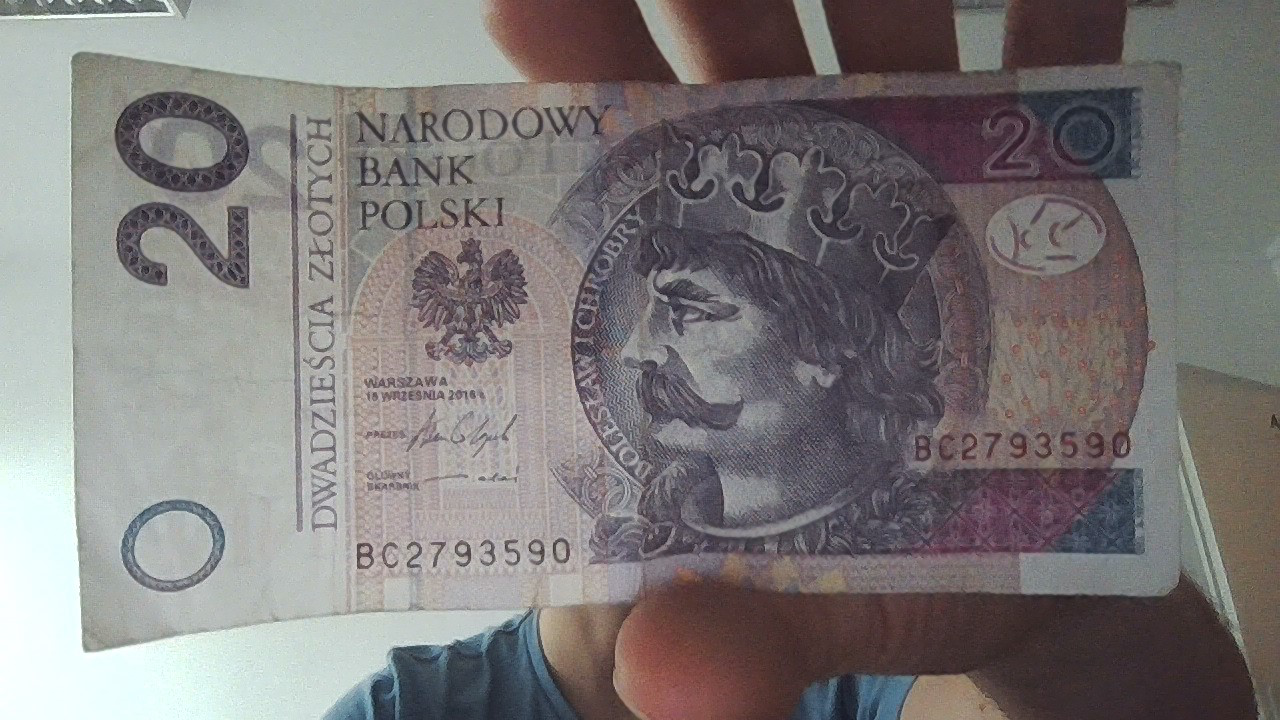

In [21]:
uploaded_file

In [22]:
learner_01.predict(uploaded_file)

('dwadziescia', tensor(0), tensor([0.9726, 0.0274]))